# Центральная предельная теорема

## Гамма-распределение (распределение Эрланга).  

https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

https://wiki2.wiki/wiki/Gamma_distribution#Logarithmic_expectation_and_variance

In [151]:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

Проверим работу функции Гамма распределения из библиотеки scipy.

In [152]:
from scipy.stats import gamma

# Test gamma function
R = gamma.rvs( a=3.0, scale=1.0, size = 10)
print ("Random Variates : \n", R) 

Random Variates : 
 [2.7138913  5.9171898  0.73748577 2.00952813 1.39062047 4.16731034
 2.04121742 5.71504532 4.56088708 3.04887021]


Сгенерируем выборку объёма 1000 из гамма-распределения (с параметрами $\kappa=2$ и $\Theta=2$):

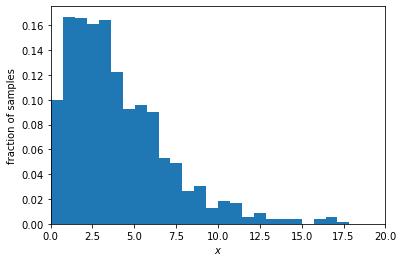

In [153]:
K=2.0
T=2.0
sample = gamma.rvs( a=K, scale=T, size = 1000) # a is k or alpha, scale is Theta or 1/scale is beta

plt.hist(sample, bins=25, density=True)
#plt.ylim([0,0.2])
plt.xlim([0,20])
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

График теоретической плотности распределения выбранной случайной величины позволит нам убедиться в правильной интерпретации входных параметров реализации Гамма-функции в scipi (совпадает с графиком из Википедии).

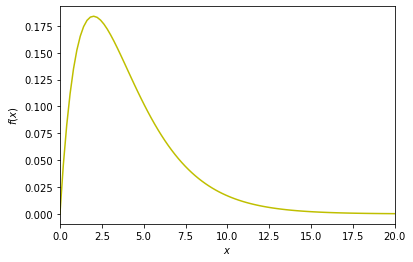

In [154]:
x = np.linspace (0, 20, 100) 
y1 = gamma.pdf(x, a=K, scale=T) # a is k or alpha, scale is Theta or 1/scale is beta

plt.plot(x, y1, "y-") # yellow
#plt.ylim([0,0.2])
plt.xlim([0,20])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Совмещаем гистограмму выборки и теоретическую плотность распределения случайной величины, уменьшив число колонок гистограммы. 

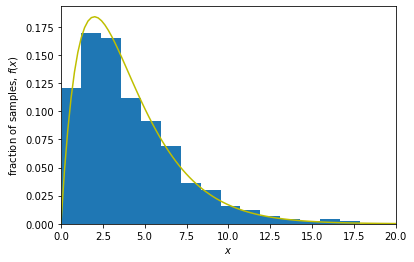

In [155]:
plt.plot(x, y1, "y-") # yellow
plt.hist(sample, bins=15, density=True)
#plt.ylim([0,0.2])
plt.xlim([0,20])
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

Генерируем 1000 выборок объема n в цикле. Для Гамма-распределения: E[X]=$\kappa$*$\Theta$, D[X]=$\kappa$*$\Theta$*$\Theta$.
В нашем случае E=4, D=8.

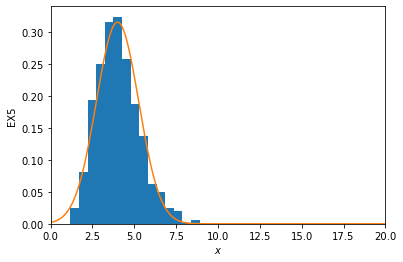

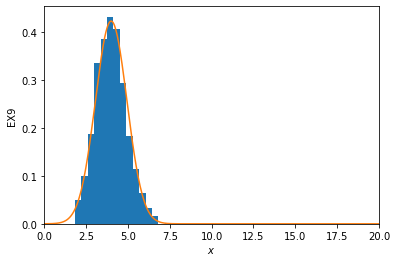

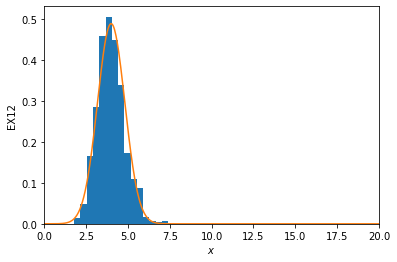

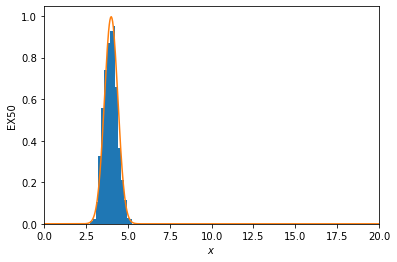

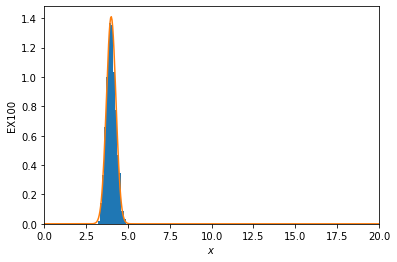

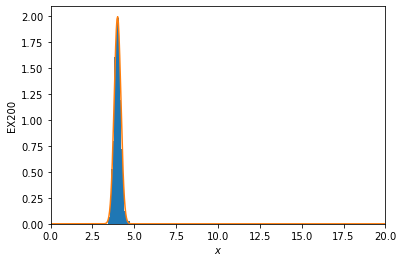

In [156]:
for n in [5, 9, 12, 50, 100, 200]:

    SmplMeans = [] # Пустой список для 1000 средних
    for i in range(0,1000,1):
        sample = gamma.rvs( a=K, scale=T, size = n)
        smpl_mean = np.mean(sample)
        SmplMeans.append(smpl_mean)
    #print (SmplMeans) 
    # Histogramm
    plt.hist(SmplMeans, bins=15, density=True)
    #plt.ylim([0,6])
    plt.xlim([0,20])
    plt.ylabel('EX%i'%n)
    plt.xlabel('$x$')
    # нормальное распределение
    norm_rv = sts.norm(4., math.sqrt(8./n))
    # теоретическая плотность распределения:
    x = np.linspace(0,20,500)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf')    
    plt.show()



Проверяем что плотности нормальных распределений отстроены корректно, например для n=20.

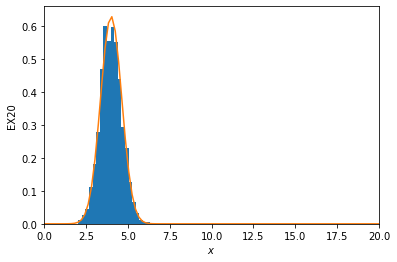

In [157]:
    n=20
    # Normal
    norm_rv = sts.norm(4., math.sqrt(8./n))
    sample = norm_rv.rvs(2000)
    plt.hist(sample, bins=20, density=True)
    # на том же графике построим теоретическую плотность распределения:
    x = np.linspace(0,20,100)
    pdf = norm_rv.pdf(x)
    plt.xlim([0,20])
    plt.ylabel('EX%i'%n)
    plt.xlabel('$x$')
    plt.plot(x, pdf, label='theoretical pdf')
    plt.show()

## Выводы

Разница между полученными распределениями показывает, что с ростом объема выборки растет вероятность получить
по ней представление о среднем значении всей совокупности. 

C ростом n точность апроксимации выборочных средних Гамма-функции (2,2) нормальным возрастает, что подтверждает верность ЦПТ для Гамма-функции с параметрами ($\kappa$=2,$\Theta$=2).

Решение позволяет поменяв переменные К и Т проанализировать варианты Гамма-Функции и с иными параметрами $\kappa$ и $\Theta$.